<a href="https://colab.research.google.com/github/aidawm/new_repo/blob/main/horse%26human_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-05-28 01:21:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c02::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  43.9MB/s    in 3.2s    

2021-05-28 01:21:42 (43.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-05-28 01:21:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [2]:

import tensorflow as tf
import numpy as np 
import os 
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref=  zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()


local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref=  zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [4]:
train_horse = os.path.join('/tmp/horse-or-human/horses')
train_human = os.path.join('/tmp/horse-or-human/humans')
valid_horse = os.path.join('/tmp/validation-horse-or-human/horses')
valid_human = os.path.join('/tmp/validation-horse-or-human/humans')
#type = str

train_horse_name = os.listdir(train_horse)
train_human_name = os.listdir(train_human)
valid_horse_name = os.listdir(valid_horse)
valid_human_name = os.listdir(valid_human)
#type = list

In [27]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(2,activation='softmax')])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)       

In [28]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [30]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')
valid_generator = valid_datagen.flow_from_directory('/tmp/validation-horse-or-human/',target_size=(300,300),batch_size=32,class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [31]:
history=model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1,validation_data=valid_generator,validation_steps=8)


Epoch 1/15
8/8 [==============================] - 91s 11s/step - loss: 2.8169 - accuracy: 0.5295 - val_loss: 0.6939 - val_accuracy: 0.4414
Epoch 2/15
8/8 [==============================] - 88s 11s/step - loss: 0.6740 - accuracy: 0.5918 - val_loss: 0.7032 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 88s 11s/step - loss: 0.7349 - accuracy: 0.5862 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 88s 11s/step - loss: 0.7049 - accuracy: 0.6085 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 98s 12s/step - loss: 0.6105 - accuracy: 0.6941 - val_loss: 0.6837 - val_accuracy: 0.5156
Epoch 6/15
8/8 [==============================] - 89s 13s/step - loss: 0.8378 - accuracy: 0.7264 - val_loss: 0.6370 - val_accuracy: 0.5977
Epoch 7/15
8/8 [==============================] - 89s 11s/step - loss: 0.6788 - accuracy: 0.7108 - val_loss: 0.6739 - val_accuracy: 0.5586
Epoch 8/15
8/8 [===========

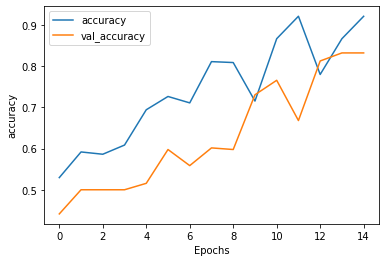

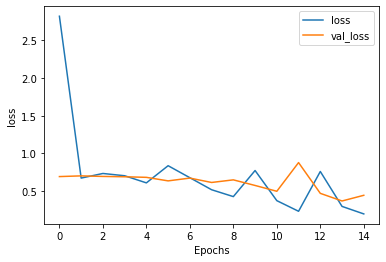

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')